# Modules

Esta tabla contiene la información a nivel de fichero (módulo).

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

full_table = get_data('modules')

# Table name, features and target.
TABLE_NAME = 'modules'
TABLE_FEATURES = ['module__name_convention', 'module__has_doc_string', 'module__global_stmts_pct', 'module__global_expressions_pct', 'module__number_of_classes', 'module__number_of_functions', 'module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct', 'module__average_stmts_function_body', 'module__average_stmts_method_body', 'module__type_annotations_pct', 'module__has_entry_point', 'module__expertise_level']
TABLE_TARGET = 'module__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

2024-07-09 23:23:27.509531 Data cache files found ...
2024-07-09 23:23:27.518534 Data cache files successfully loaded!!
Features shape: (18226, 14)
Target shape: (18226,)
As we can see the downloaded data contains a total of 18226 instances. Each of the instances corresponds to a program. For each program we have 14 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18226 entries, 0 to 18225
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   module__name_convention              18226 non-null  object 
 1   module__has_doc_string               18226 non-null  bool   
 2   module__global_stmts_pct             18226 non-null  float64
 3   module__global_expressions_pct       18226 non-null  float64
 4   module__number_of_classes            18226 non-null  int64  
 5   module__number_of_functions          18226 non-null  int64  
 6   module__class_defs_pct               18226 non-null  float64
 7   module__function_defs_pct            18226 non-null  float64
 8   module__enum_defs_pct                18226 non-null  float64
 9   module__average_stmts_function_body  18226 non-null  float64
 10  module__average_stmts_method_body    18226 non-null  float64
 11  module__type_annotations_pct

Cómo podemos ver la tabla está compuesta por diez variables numéricas, dos variables boleanas y dos de tipo objeto. Las dos últimas variables son la etiqueta de la instancia y el name convention.

### 2.1 - Equilibrado de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 39.09% instances for BEGINNER class and 60.91% for EXPERT class.


### 2.2 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

module__name_convention                0
module__has_doc_string                 0
module__global_stmts_pct               0
module__global_expressions_pct         0
module__number_of_classes              0
module__number_of_functions            0
module__class_defs_pct                 0
module__function_defs_pct              0
module__enum_defs_pct                  0
module__average_stmts_function_body    0
module__average_stmts_method_body      0
module__type_annotations_pct           0
module__has_entry_point                0
module__expertise_level                0
dtype: int64

In [5]:
print_empty_cols(X)

module__name_convention
-----------------------
0 instancias no tienen un valor para la columna module__name_convention


module__has_doc_string
----------------------
0 instancias no tienen un valor para la columna module__has_doc_string


module__global_stmts_pct
------------------------
0 instancias no tienen un valor para la columna module__global_stmts_pct


module__global_expressions_pct
------------------------------
0 instancias no tienen un valor para la columna module__global_expressions_pct


module__number_of_classes
-------------------------
0 instancias no tienen un valor para la columna module__number_of_classes


module__number_of_functions
---------------------------
0 instancias no tienen un valor para la columna module__number_of_functions


module__class_defs_pct
----------------------
0 instancias no tienen un valor para la columna module__class_defs_pct


module__function_defs_pct
-------------------------
0 instancias no tienen un valor para la columna module__fu

### 2.3 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
module__name_convention,18226,6,SnakeCase,8629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__has_doc_string,18226,2,False,13695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__global_stmts_pct,18226.0,NaN,NaN,NaN,0.227542,0.271846,0.0,0.0,0.125,0.333333,1.0
module__global_expressions_pct,18226.0,NaN,NaN,NaN,0.094516,0.171585,0.0,0.0,0.0,0.125,1.0
module__number_of_classes,18226.0,NaN,NaN,NaN,1.047899,3.35827,0.0,0.0,0.0,1.0,113.0
module__number_of_functions,18226.0,NaN,NaN,NaN,2.523044,6.308384,0.0,0.0,1.0,3.0,258.0
module__class_defs_pct,18226.0,NaN,NaN,NaN,0.31924,0.429019,0.0,0.0,0.0,0.888889,1.0
module__function_defs_pct,18226.0,NaN,NaN,NaN,0.458978,0.464533,0.0,0.0,0.333333,1.0,1.0
module__enum_defs_pct,18226.0,NaN,NaN,NaN,0.003743,0.045174,0.0,0.0,0.0,0.0,1.0
module__average_stmts_function_body,18226.0,NaN,NaN,NaN,2.732112,3.928782,0.0,0.0,1.25,4.4,53.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "module__class_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__function_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__enum_defs_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
    "module__number_of_classes": [(0, 0), (1, 1), (2,2), (3,3), (4,inf)],  # min: 0 max: 113
    "module__number_of_functions": [(0, 0), (0, inf)], # min: 0 max: 258
    "module__type_annotations_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 max: 1.0
    "module__average_stmts_function_body": [(0.0, 0.0), (0.0, 3.0), (3.0, inf)], #min: 0.0 max: 53.0
    "module__average_stmts_method_body": [(0.0, 0.0), (0.0, 3.0), (3.0, inf)], # min: 0.0 max: 114.0
    "module__global_expressions_pct": [(0,0), (0.0, inf)], # min: 0.0 max: 1.0
    "module__global_stmts_pct": [(0, 0), (0.0, inf)] # min: 0.0 max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['module__class_defs_pct'], 10))
print(get_statistics(X_copy, ['module__function_defs_pct'], 10))
print(get_statistics(X_copy, ['module__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['module__number_of_classes'], 10))
print(get_statistics(X_copy, ['module__number_of_functions'], 10))
print(get_statistics(X_copy, ['module__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['module__average_stmts_function_body'], 10))
print(get_statistics(X_copy, ['module__average_stmts_method_body'], 10))
print(get_statistics(X_copy, ['module__global_expressions_pct'], 10))
print(get_statistics(X_copy, ['module__global_stmts_pct'], 10))
print(get_statistics(X_copy, ['module__has_doc_string'], 10))
print(get_statistics(X_copy, ['module__has_entry_point'], 10))
print(get_statistics(X_copy, ['module__name_convention'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))
print(get_statistics(X_copy, ['module__global_expressions_pct', 'module__global_stmts_pct'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
module__class_defs_pct  count  percentage
             [0.0_0.0]  10582   58.059914
             [1.0_1.0]   4530   24.854603
             [0.0_1.0)   3114   17.085482

module__function_defs_pct  count  percentage
                [0.0_0.0]   8602   47.196313
                [1.0_1.0]   6570   36.047405
                [0.0_1.0)   3054   16.756282

module__enum_defs_pct  count  percentage
            [0.0_0.0]  18037    98.96302
            [0.0_inf]    189     1.03698

module__number_of_classes  count  percentage
                    [0_0]  10582   58.059914
                    [1_1]   4684   25.699550
                    [2_2]   1278    7.011961
                  [4_inf]   1192    6.540108
                    [3_3]    490    2.688467

module__number_of_functions  count  percentage
                    [0_inf]   9624   52.803687
                      [0_0]   8602   47.196313

module__type_annotations_pct  count  percentage
                   [0.0_0.0]  12754   69.9

In [8]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (18226, 20)
Target shape: (18226,)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

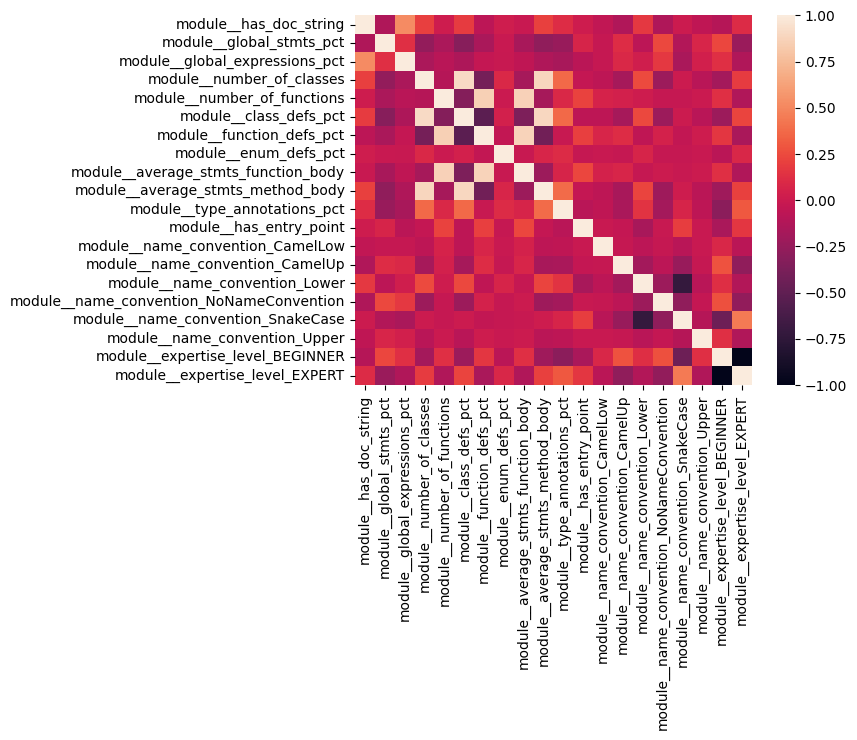

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 13 variable (2 booleanas, 6 porcentuales, 4 numericas y una categorica) se hara un analisis detallado

### Variable has_doc_string (1/13)
Esta variable es de tipo booleano y representa si el fichero contiene un comentario como primer nodo.

<Axes: xlabel='module__has_doc_string', ylabel='Count'>

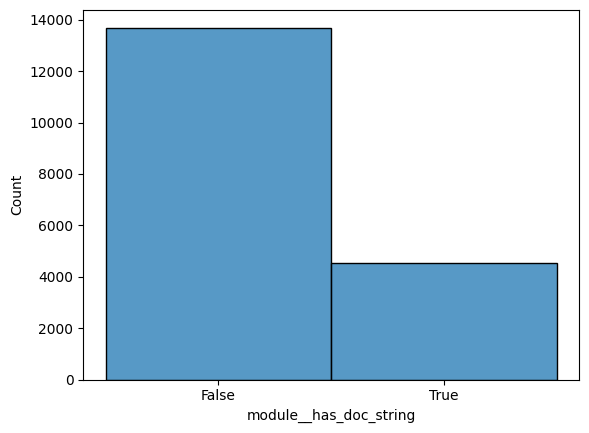

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_doc_string'], discrete=True)

In [11]:
num_true_values = len(X[X['module__has_doc_string'] == True])
num_false_values = len(X[X['module__has_doc_string'] == False])
std = X['module__has_doc_string'].std()
freq_true = len(X[X['module__has_doc_string'] == True]) / len(X['module__has_doc_string'])
freq_false = len(X[X['module__has_doc_string'] == False]) / len(X['module__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 4531 valores verdaderos y 13695 valores falsos. Y, la desviación típica es de 0.43221375346183777
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.24860089981345332.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.7513991001865467.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_doc_string', possible_values)

La variable module__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_doc_string toma el valor de 0.0 en un 75.14% de los items.
La variable module__has_doc_string toma el valor de 1.0 en un 24.86% de los items.


In [13]:
X[X['module__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,4531.0,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000
mean,1.0,0.141747,0.170608,1.604061,3.044582,0.435450,0.406631,0.005414,2.610403,2.432765,0.193270,0.138821,0.001104,0.006400,0.503200,0.013684,0.474730,0.000883,0.303465,0.696535
std,0.0,0.176827,0.209757,4.393696,7.722262,0.440211,0.436080,0.054634,3.684996,2.836629,0.274837,0.345798,0.033204,0.079755,0.500045,0.116186,0.499416,0.029702,0.459805,0.459805
min,1.0,0.000000,0.002703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.090909,0.100000,1.000000,1.000000,0.294118,0.222222,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.0,0.200000,0.200000,1.000000,3.000000,1.000000,1.000000,0.000000,4.333333,4.092752,0.469697,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.0,0.987805,1.000000,113.000000,172.000000,1.000000,1.000000,1.000000,42.000000,24.799999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable has_entry_point (2/13)
Esta variable es de tipo booleano y representa si el fichero contiene el idiom "if __name__ == '__main__'". 

<Axes: xlabel='module__has_entry_point', ylabel='Count'>

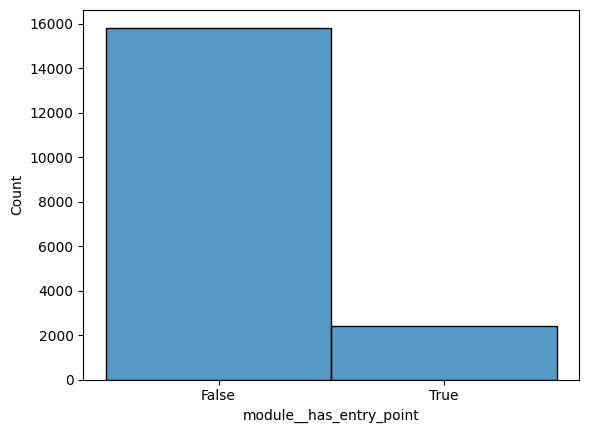

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_entry_point'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['module__has_entry_point'] == True])
num_false_values = len(X[X['module__has_entry_point'] == False])
std = X['module__has_entry_point'].std()
freq_true = len(X[X['module__has_entry_point'] == True]) / len(X['module__has_entry_point'])
freq_false = len(X[X['module__has_entry_point'] == False]) / len(X['module__has_entry_point'])
print(f'La variable has_entry_point contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a False es {freq_false}.')

La variable has_entry_point contiene 2395 valores verdaderos y 15831 valores falsos. Y, la desviación típica es de 0.3378527760505676
La frecuencia con la que programa puede tener la variable has_entry_point a True es 0.13140568418742457.
La frecuencia con la que programa puede tener la variable has_entry_point a False es 0.8685943158125754.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_entry_point', possible_values)

La variable module__has_entry_point contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_entry_point toma el valor de 0.0 en un 86.86% de los items.
La variable module__has_entry_point toma el valor de 1.0 en un 13.14% de los items.


In [17]:
X[X['module__has_entry_point'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.0,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000
mean,0.262630,0.187452,0.049996,1.197495,4.492693,0.230002,0.706170,0.000780,5.066611,1.702623,0.079709,1.0,0.006681,0.037996,0.160334,0.066806,0.718163,0.010021,0.192484,0.807516
std,0.440155,0.148189,0.098127,5.187044,6.920440,0.374196,0.412321,0.016772,5.371254,4.028246,0.194814,0.0,0.081478,0.191226,0.366992,0.249738,0.449988,0.099622,0.394334,0.394334
min,0.000000,0.008547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.083333,0.000000,0.000000,1.000000,0.000000,0.380042,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.142857,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.250000,0.066667,1.000000,5.000000,0.333333,1.000000,0.000000,7.000000,2.584627,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.886792,64.000000,69.000000,1.000000,1.000000,0.500000,53.000000,114.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable number_of_classes (3/13)
Esta variable es de tipo numérica y nos indica el número de clases definidos en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 113. Con una media de 1,047899.

<Axes: ylabel='module__number_of_classes'>

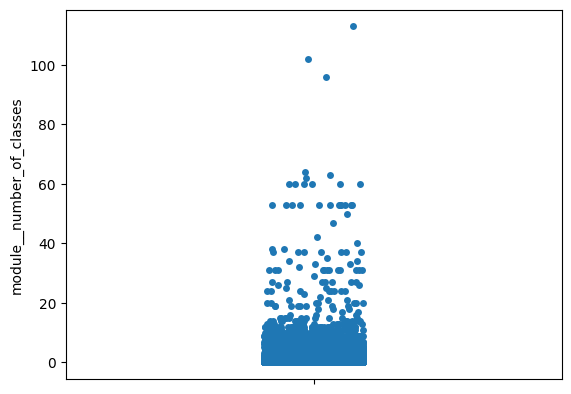

In [18]:
sns.stripplot(X['module__number_of_classes'])

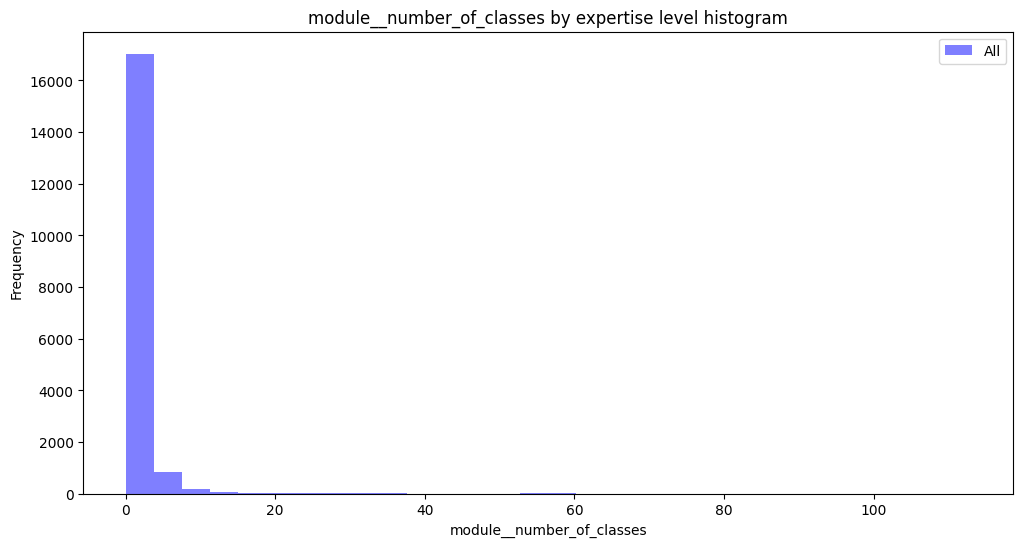

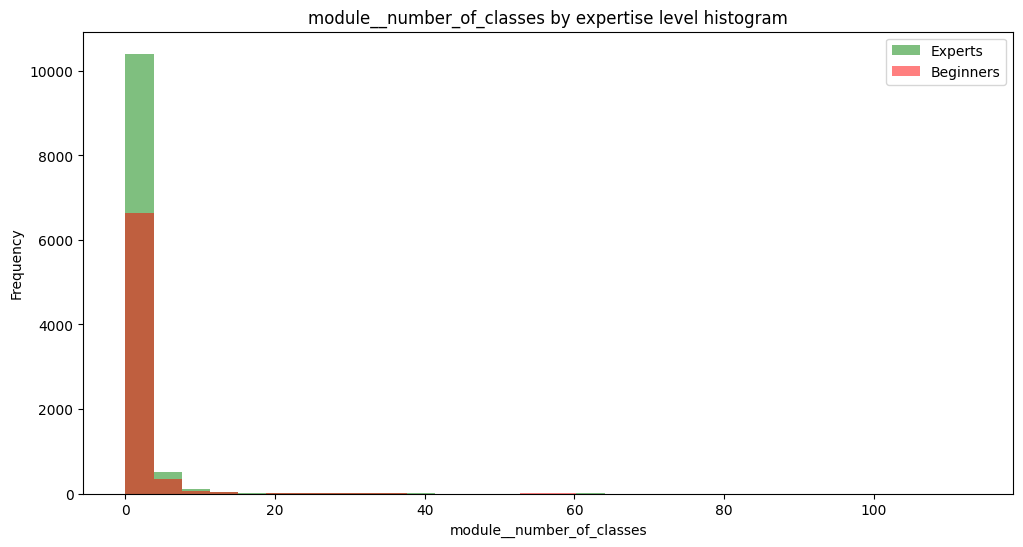

In [19]:
print_histogram(X, 'module__number_of_classes', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__number_of_classes', 'module__expertise_level', bins=30, include_all=False, include_experts=True, include_beginners=True)

In [20]:
print_outliers_for_df_column(X, 'module__number_of_classes')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9807830397245415
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.048447452067818045,76.83783169407444]
-3.0IQR: 0 instancias tienen un valor para module__number_of_classes inferior a -3.0 (Q1-3*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_classes inferior a -1.5 (Q1-1.5*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
+1.5IQR: 1682 instancias tienen un valor para module__number_of_classes superior a 2.5 (Q3+1.5*IQR) para module__number_of_classes. Representando un 9.229% del total de instancias.
+3.0IQR: 839 instancias tienen un valor para module__number_of_classes superior a 4.0 (Q3-3*IQR) para module__number_of_classes. Representando un 4.603% del total de instancias.
L: 0 instancias tien

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 76 (Con un MC de 98 usamos U)

In [21]:
X[X['module__number_of_classes'] > 76.8].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.0,3.0,3.0,3.000000,3.0,3.000000,3.0,3.0,3.0
mean,1.0,0.020280,0.144219,103.666664,3.000000,0.971435,0.028565,0.0,3.041667,2.380625,0.129630,0.0,0.0,0.0,0.666667,0.0,0.333333,0.0,0.0,1.0
std,0.0,0.018173,0.235638,8.621678,4.358899,0.042108,0.042108,0.0,4.430599,0.982732,0.224525,0.0,0.0,0.0,0.577350,0.0,0.577350,0.0,0.0,0.0
min,1.0,0.000000,0.007576,96.000000,0.000000,0.923077,0.000000,0.0,0.000000,1.793388,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0
25%,1.0,0.012876,0.008174,99.000000,0.500000,0.957152,0.004386,0.0,0.500000,1.813361,0.000000,0.0,0.0,0.0,0.500000,0.0,0.000000,0.0,0.0,1.0
50%,1.0,0.025751,0.008772,102.000000,1.000000,0.991228,0.008772,0.0,1.000000,1.833333,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.0
75%,1.0,0.030419,0.212540,107.500000,4.500000,0.995614,0.042848,0.0,4.562500,2.674242,0.194444,0.0,0.0,0.0,1.000000,0.0,0.500000,0.0,0.0,1.0
max,1.0,0.035088,0.416309,113.000000,8.000000,1.000000,0.076923,0.0,8.125000,3.515152,0.388889,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,1.0


### IMPORTANTE

Hay dos modulos con más de 96 clases.

### Variable number_of_functions (4/13)
Esta variable representa el número de funciones en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 258. Con una media de 2.523044.

<Axes: ylabel='module__number_of_functions'>

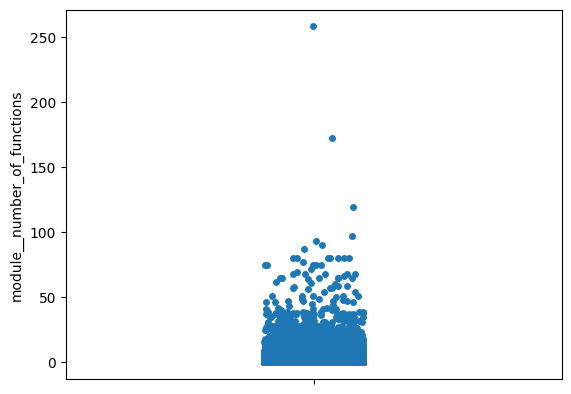

In [22]:
sns.stripplot(X['module__number_of_functions'])

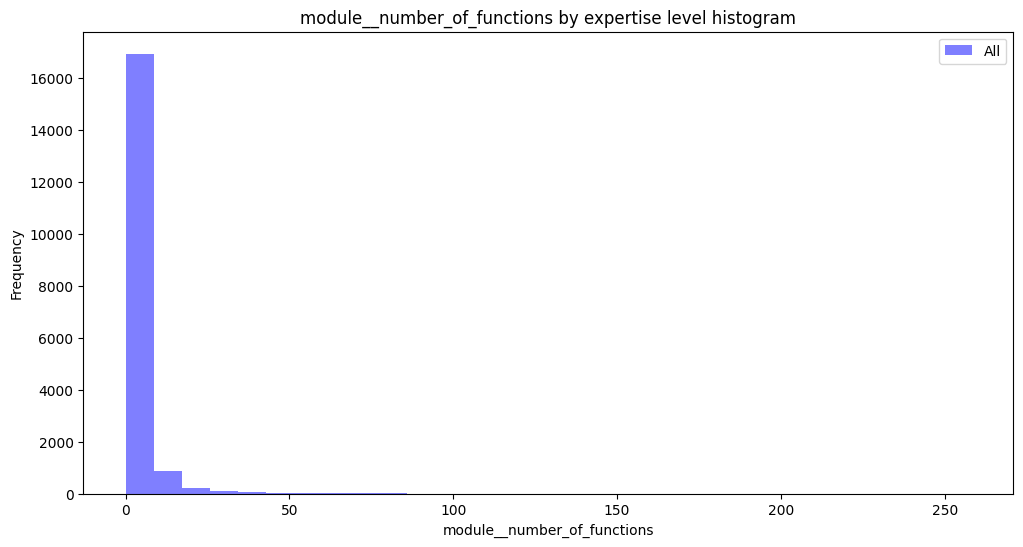

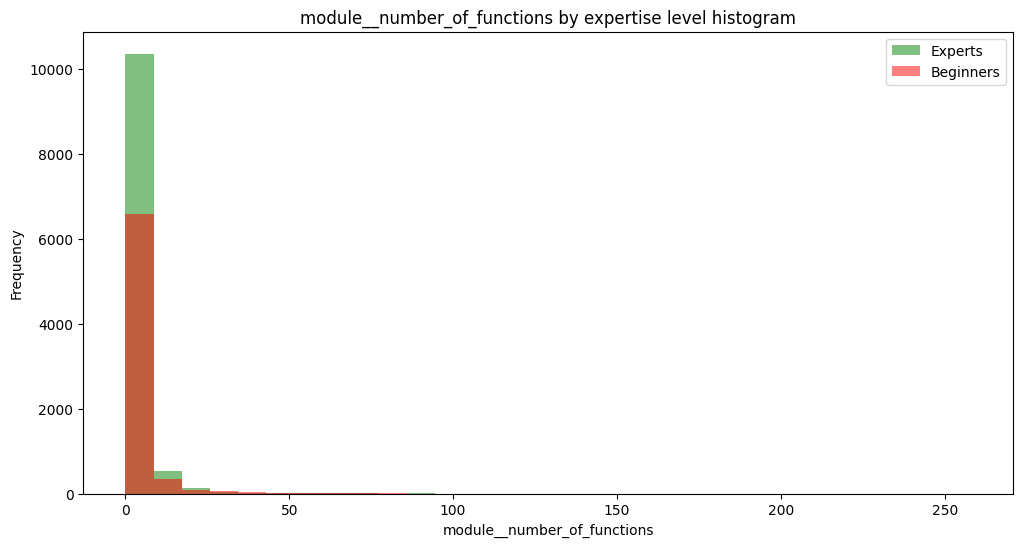

In [23]:
print_histogram(X, 'module__number_of_functions', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__number_of_functions', 'module__expertise_level', bins=30, include_all=False)

In [24]:
print_outliers_for_df_column(X, 'module__number_of_functions')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9262960283332238
Rango valores atípicos extremos (Tukey): [-9.0,12.0]
Rango valores atípicos leves (Tukey): [-4.5,7.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.17587905592785547,185.95889499714087]
-3.0IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -9.0 (Q1-3*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -4.5 (Q1-1.5*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
+1.5IQR: 1523 instancias tienen un valor para module__number_of_functions superior a 7.5 (Q3+1.5*IQR) para module__number_of_functions. Representando un 8.356% del total de instancias.
+3.0IQR: 739 instancias tienen un valor para module__number_of_functions superior a 12.0 (Q3-3*IQR) para module__number_of_functions. Representando un 4.055% del total de instancias.
L:

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 185 (Con un MC de 92 usamos U)

In [25]:
X[X['module__number_of_functions'] > 185.9].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,1.0,1.000000,1.000000,1.0,1.0,1.00000,1.00000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.0,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
25%,0.0,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
50%,0.0,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
75%,0.0,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
max,0.0,0.631461,0.002247,62.0,258.0,0.19375,0.80625,0.0,4.841085,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### IMPORTANTE

Hay un modulo con más de 185 funciones.

### Variable average_stmts_function_body (5/13)
Esta variable representa el número medio de sentencias en el cuerpo de las funciones del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 53. Con una media de 2.732112.

<Axes: ylabel='module__average_stmts_function_body'>

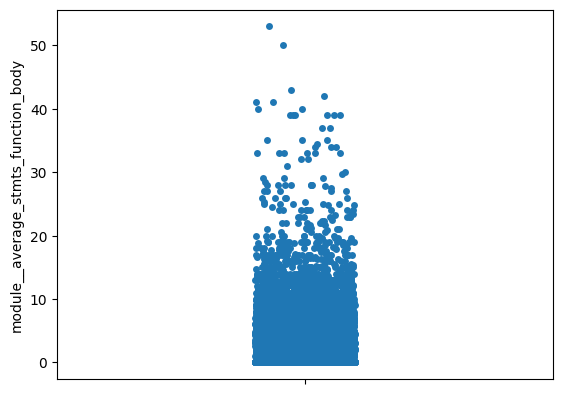

In [26]:
sns.stripplot(X['module__average_stmts_function_body'])

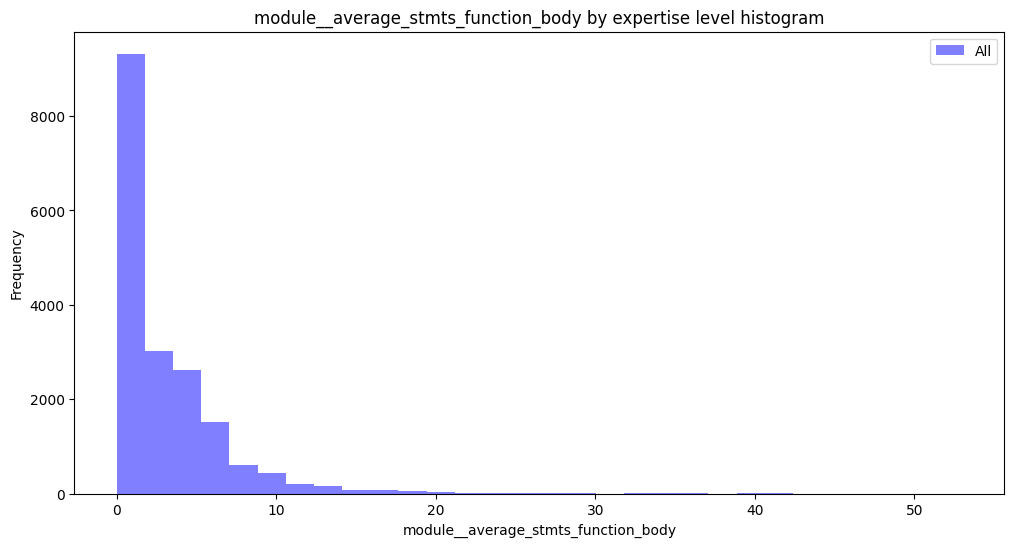

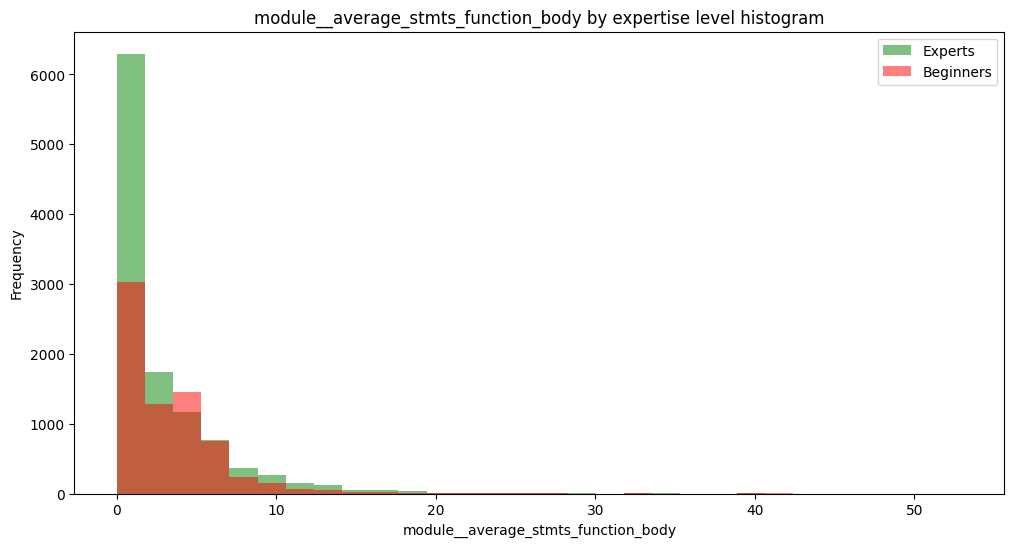

In [27]:
print_histogram(X, 'module__average_stmts_function_body', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__average_stmts_function_body', 'module__expertise_level', bins=30, include_all=False)

In [28]:
print_outliers_for_df_column(X, 'module__average_stmts_function_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5784231885478149
Rango valores atípicos extremos (Tukey): [-13.200000286102295,17.600000381469727]
Rango valores atípicos leves (Tukey): [-6.6000001430511475,11.000000238418579]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.8716114936044735,71.13719384247109]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -13.200000286102295 (Q1-3*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -6.6000001430511475 (Q1-1.5*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
+1.5IQR: 595 instancias tienen un valor para module__average_stmts_function_body superior a 11.000000238418579 (Q3+1.5*IQR) para module__average_stmts_function_body. Representando un 3.265% del total de instancias.
+3.0IQR: 176 instancias tienen un va

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 17.6 (Con un MC de 57 usamos Tuckey)

In [29]:
X[X['module__average_stmts_function_body'] > 17.6].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.0,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,0.215909,0.101837,0.067626,0.329545,2.437500,0.052650,0.947350,0.0,24.608381,0.528263,0.119484,0.392045,0.022727,0.062500,0.261364,0.079545,0.545455,0.028409,0.329545,0.670455
std,0.412625,0.133602,0.134151,1.375056,3.930331,0.163809,0.163809,0.0,7.074607,2.200164,0.275378,0.489600,0.149458,0.242752,0.440631,0.271360,0.499350,0.166613,0.471389,0.471389
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.250000,0.0,17.666666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.060181,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,22.291667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,0.142857,0.071429,0.000000,2.000000,0.000000,1.000000,0.0,28.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,0.600000,0.751323,11.000000,41.000000,0.750000,1.000000,0.0,53.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable average_stmts_method_body (6/13)
Esta variable representa el número medio de sentencias en el cuerpo de los métodos del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 114. Con una media de 1.66441.

<Axes: ylabel='module__average_stmts_method_body'>

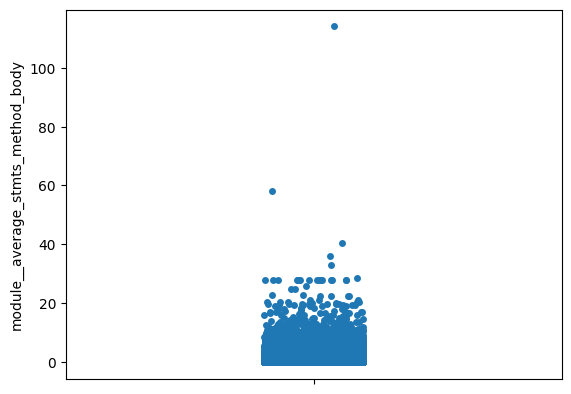

In [30]:
sns.stripplot(X['module__average_stmts_method_body'])

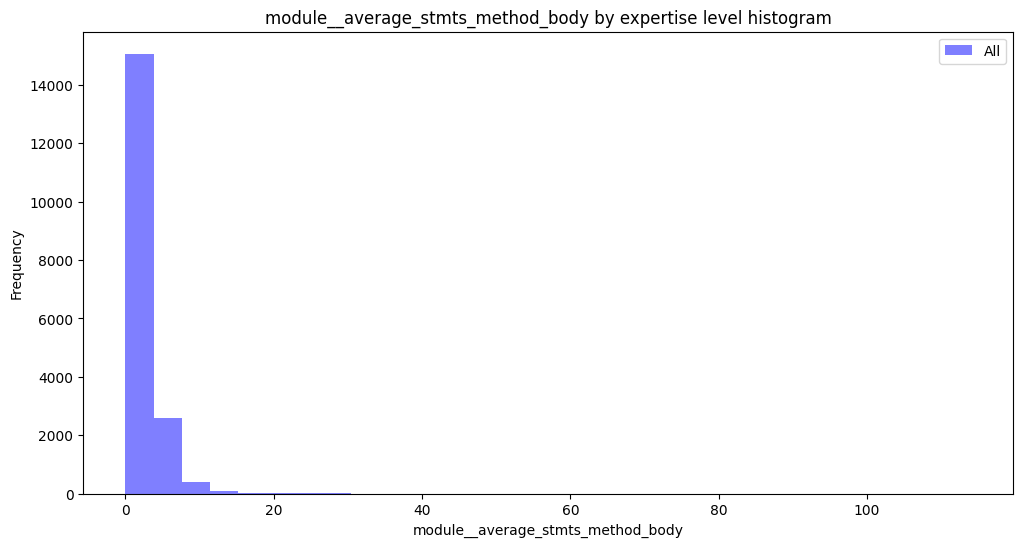

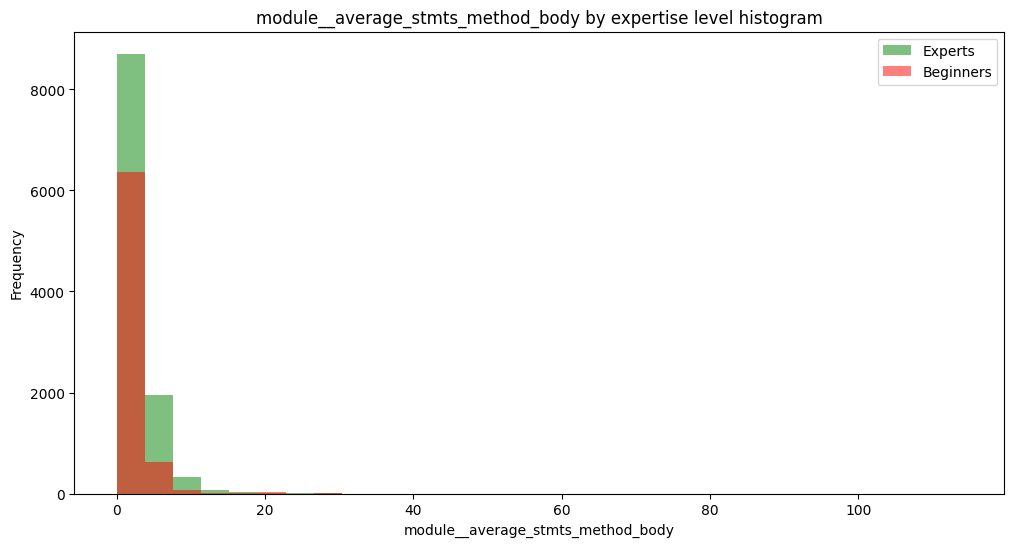

In [31]:
print_histogram(X, 'module__average_stmts_method_body', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__average_stmts_method_body', 'module__expertise_level', bins=30, include_all=False)

### IMPORTANTE
El valor máximo está muy alejados del siguiente.

In [32]:
print_outliers_for_df_column(X, 'module__average_stmts_method_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5081587317381796
Rango valores atípicos extremos (Tukey): [-9.0,12.0]
Rango valores atípicos leves (Tukey): [-4.5,7.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.7599685985084859,37.35378918781224]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_method_body inferior a -9.0 (Q1-3*IQR) para module__average_stmts_method_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_method_body inferior a -4.5 (Q1-1.5*IQR) para module__average_stmts_method_body. Representando un 0.0% del total de instancias.
+1.5IQR: 587 instancias tienen un valor para module__average_stmts_method_body superior a 7.5 (Q3+1.5*IQR) para module__average_stmts_method_body. Representando un 3.221% del total de instancias.
+3.0IQR: 152 instancias tienen un valor para module__average_stmts_method_body superior a 12.0 (Q3-3*IQR) para module__average_stmts_method_body. Repres

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 37,3 (Con un MC de 50 usamos U)

In [33]:
X[X['module__average_stmts_method_body'] > 37.3].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,3.0,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.0,3.0,3.000000,3.0,3.000000,3.0,3.0,3.0
mean,0.0,0.175926,0.0,1.333333,1.000000,0.750000,0.250000,0.0,1.888889,70.862320,0.075758,0.666667,0.0,0.0,0.666667,0.0,0.333333,0.0,0.0,1.0
std,0.0,0.236247,0.0,0.577350,1.732051,0.433013,0.433013,0.0,3.271652,38.379292,0.131216,0.577350,0.0,0.0,0.577350,0.0,0.577350,0.0,0.0,0.0
min,0.0,0.000000,0.0,1.000000,0.000000,0.250000,0.000000,0.0,0.000000,40.500000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0
25%,0.0,0.041667,0.0,1.000000,0.000000,0.625000,0.000000,0.0,0.000000,49.293478,0.000000,0.500000,0.0,0.0,0.500000,0.0,0.000000,0.0,0.0,1.0
50%,0.0,0.083333,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,58.086956,0.000000,1.000000,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.0
75%,0.0,0.263889,0.0,1.500000,1.500000,1.000000,0.375000,0.0,2.833333,86.043478,0.113636,1.000000,0.0,0.0,1.000000,0.0,0.500000,0.0,0.0,1.0
max,0.0,0.444444,0.0,2.000000,3.000000,1.000000,0.750000,0.0,5.666667,114.000000,0.227273,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,1.0


### IMPORTANTE
Hay 3 modulos con más de 37 sentencias de media en el cuerpo de los métodos.

### Variable name_convention (7/13)
Esta variable es de tipo categórica y representa la name_convention del nombre del fichero.

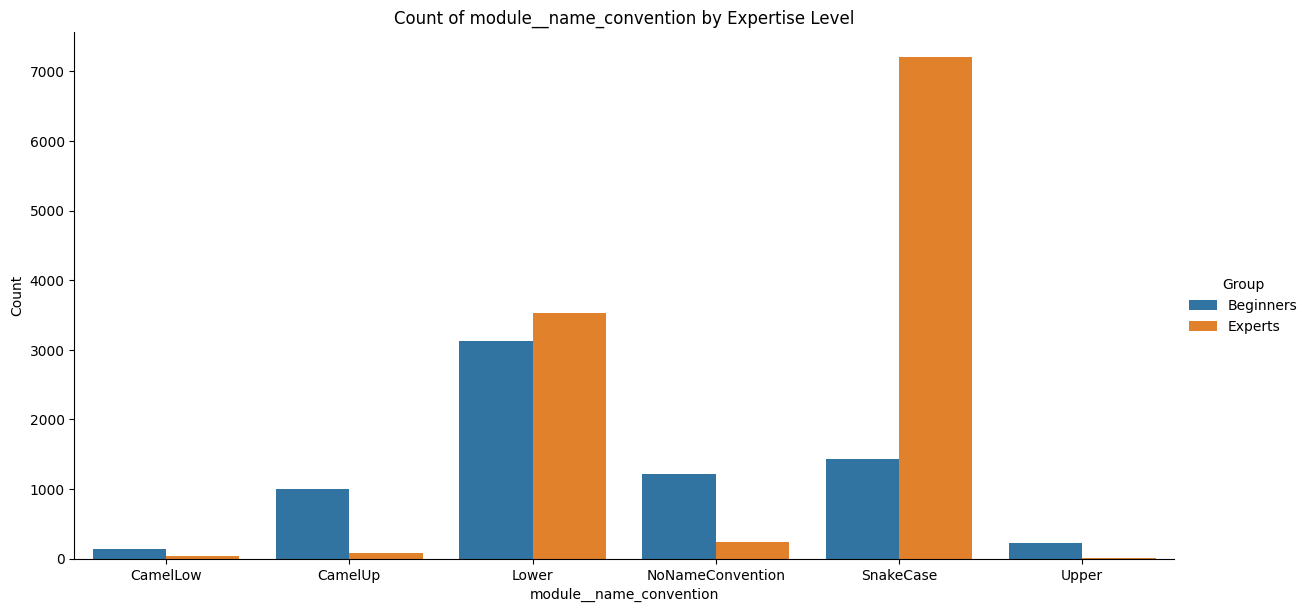

In [34]:
print_categorical_histogram(full_table, 'module__name_convention','module__expertise_level', include_all=False)

In [35]:
print_frequency_anal_for_cat_var(full_table, 'module__name_convention')

La variable module__name_convention contiene 6 valores distintos.
El umbral de outlier es de 0.03333333333333333%
La variable module__name_convention toma el valor de SnakeCase en un 47.34% de los items.
La variable module__name_convention toma el valor de Lower en un 36.54% de los items.
La variable module__name_convention toma el valor de NoNameConvention en un 7.989% de los items.
La variable module__name_convention toma el valor de CamelUp en un 5.926% de los items.
La variable module__name_convention toma el valor de Upper en un 1.289% de los items.
La variable module__name_convention toma el valor de CamelLow en un 0.9163% de los items.


In [36]:
print_values_usage_for_cat_var(full_table, 'module__name_convention', NAMING_CONVENTION_VALUES)

La variable module__name_convention puede tomar 7 valores distintos
	6 (85.71%) valores utilizados
	1 (14.29%) valores NO utilizados
		La variable module__name_convention nunca toma valor Discard.


### Variable global_stmts_pct (8/13)
Esta variable representa la proporción de los nodos en el global scope que son sentencias. Toma los valores de 0.0 - 1.0. La media es 0.227542.

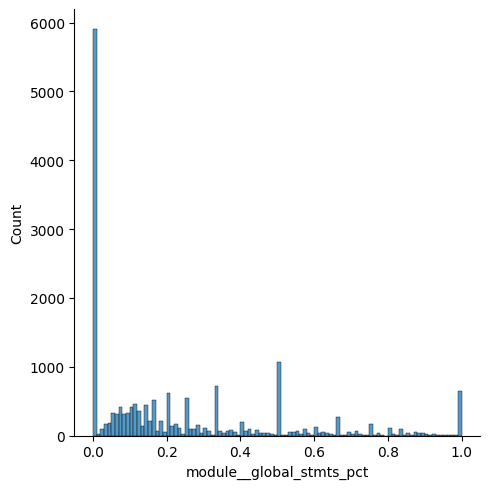

In [37]:
sns.displot(X['module__global_stmts_pct'], bins=[i / 100 for i in range(0, 101)])

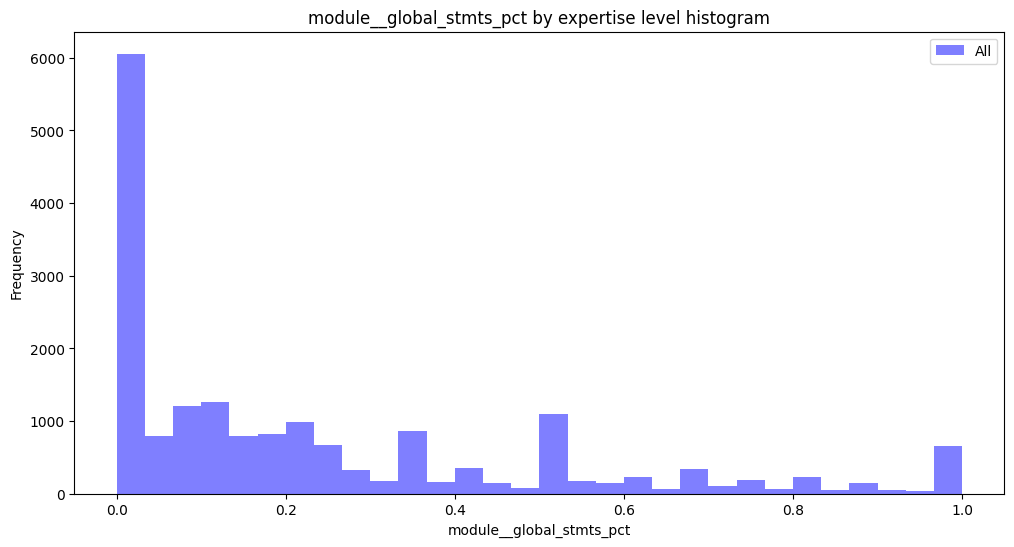

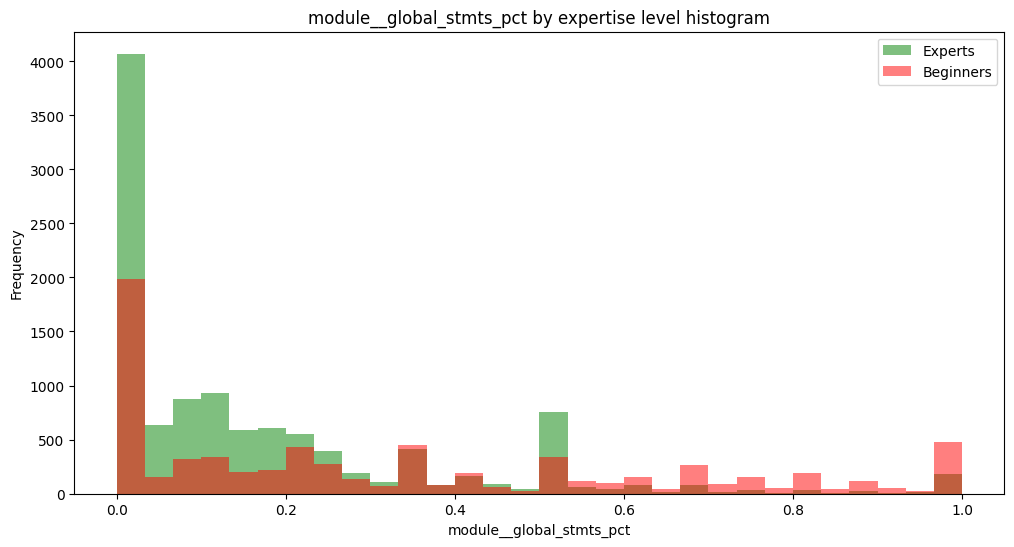

In [38]:
print_histogram(X, 'module__global_stmts_pct', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__global_stmts_pct', 'module__expertise_level', bins=30, include_all=False)

In [39]:
print_outliers_for_df_column(X, 'module__global_stmts_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5006119757890701
Rango valores atípicos extremos (Tukey): [-1.0000000298023224,1.3333333730697632]
Rango valores atípicos leves (Tukey): [-0.5000000149011612,0.833333358168602]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.08670106894617238,4.036916428249711]
-3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -1.0000000298023224 (Q1-3*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -0.5000000149011612 (Q1-1.5*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 943 instancias tienen un valor para module__global_stmts_pct superior a 0.833333358168602 (Q3+1.5*IQR) para module__global_stmts_pct. Representando un 5.174% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct superior a 1.3333333730697632 (Q3-3

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.84 (Con un MC de 50 usamos Tuckey)

In [40]:
X[X['module__global_stmts_pct'] > 0.84].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.00000,935.00000
mean,0.024599,0.968933,0.016429,0.025668,0.032086,0.012359,0.024005,0.001070,0.072727,0.033369,0.002118,0.008556,0.009626,0.137968,0.291979,0.309091,0.207487,0.043850,0.75508,0.24492
std,0.154982,0.050108,0.039518,0.256362,0.242748,0.109338,0.152280,0.032703,0.534219,0.470886,0.037532,0.092152,0.097689,0.345051,0.454916,0.462366,0.405724,0.204871,0.43027,0.43027
min,0.000000,0.842105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.000000,0.928571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.00000
max,1.000000,1.000000,0.157895,5.000000,4.000000,1.000000,1.000000,1.000000,6.000000,7.500000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


### IMPORTANTE
Comprobar un modulo que tiene todo a 0

### Variable global_expressions_pct (9/13)
Esta variable representa la proporción de los nodos en el global scope son expresiones. Este campo toma valores del 0.0 - 1.0. Su media es 0.094516.

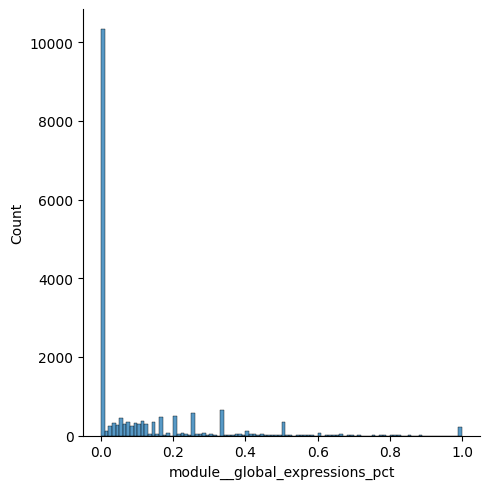

In [41]:
sns.displot(X['module__global_expressions_pct'], bins=[i / 100 for i in range(0, 101)])

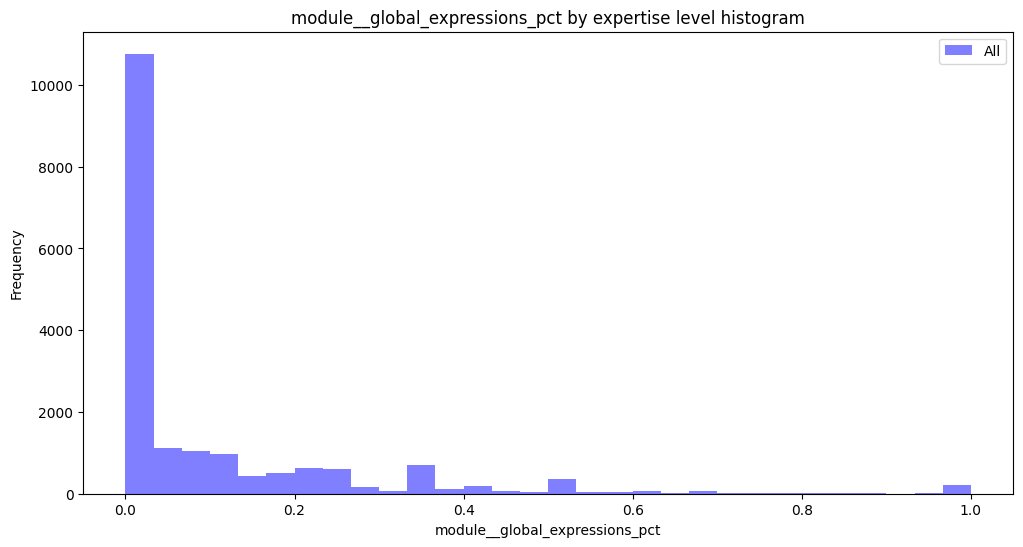

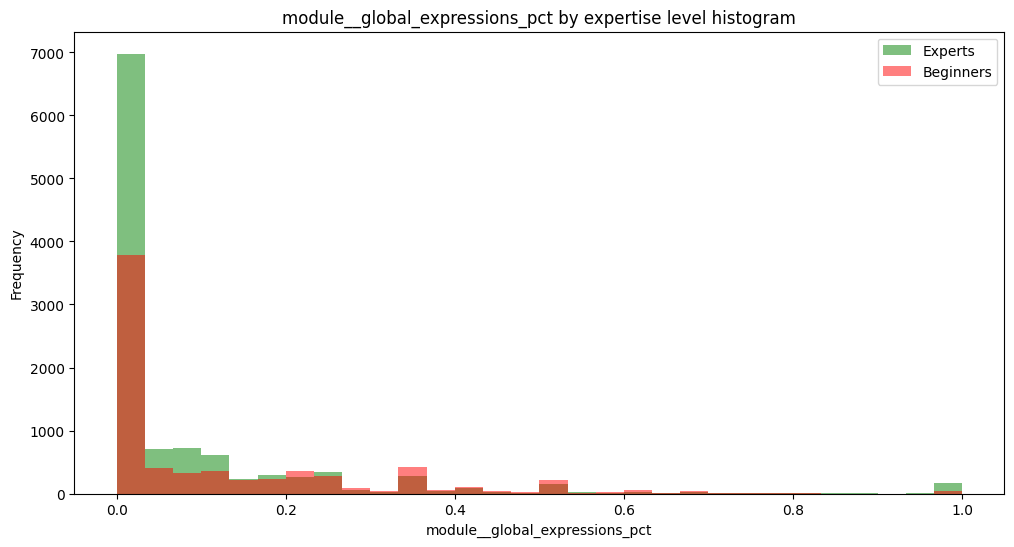

In [42]:
print_histogram(X, 'module__global_expressions_pct', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__global_expressions_pct', 'module__expertise_level', bins=30, include_all=False)

In [43]:
print_outliers_for_df_column(X, 'module__global_expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6924707653238275
Rango valores atípicos extremos (Tukey): [-0.375,0.5]
Rango valores atípicos leves (Tukey): [-0.1875,0.3125]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.016612097031117618,3.1168939881714683]
-3.0IQR: 0 instancias tienen un valor para module__global_expressions_pct inferior a -0.375 (Q1-3*IQR) para module__global_expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_expressions_pct inferior a -0.1875 (Q1-1.5*IQR) para module__global_expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1950 instancias tienen un valor para module__global_expressions_pct superior a 0.3125 (Q3+1.5*IQR) para module__global_expressions_pct. Representando un 10.7% del total de instancias.
+3.0IQR: 503 instancias tienen un valor para module__global_expressions_pct superior a 0.5 (Q3-3*IQR) para module__global_expressions_pct. Representando

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.5 (Con un MC de 69 usamos Tuckey Extremo)

In [44]:
X[X['module__global_expressions_pct'] > 0.5].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,0.467197,0.103100,0.795730,0.039761,0.604374,0.022465,0.272763,0.000994,1.603094,0.072678,0.003872,0.031809,0.005964,0.087475,0.143141,0.125249,0.612326,0.025845,0.419483,0.580517
std,0.499419,0.128632,0.190152,0.279459,2.399481,0.142097,0.444347,0.022294,3.430950,0.526974,0.047811,0.175666,0.077074,0.282811,0.350565,0.331330,0.487705,0.158830,0.493966,0.493966
min,0.000000,0.000000,0.513514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.751323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.200000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,0.466667,1.000000,4.000000,41.000000,1.000000,1.000000,0.500000,28.500000,6.500000,0.833333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
X[X['module__global_expressions_pct'] == 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,10304.0,10304.000000,10304.0,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000,10304.000000
mean,0.0,0.211826,0.0,0.928766,2.470982,0.343628,0.466031,0.003812,2.811928,1.736370,0.159150,0.150039,0.011937,0.048913,0.332589,0.051727,0.543963,0.010870,0.347632,0.652368
std,0.0,0.286226,0.0,2.106956,5.300934,0.440563,0.467065,0.046281,4.124990,3.195805,0.257278,0.357127,0.108608,0.215697,0.471164,0.221487,0.498088,0.103694,0.476242,0.476242
min,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.100000,0.0,0.000000,1.000000,0.000000,0.333333,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.0,0.300000,0.0,1.000000,3.000000,1.000000,1.000000,0.000000,4.444445,3.000000,0.333333,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,0.0,1.000000,0.0,50.000000,90.000000,1.000000,1.000000,1.000000,53.000000,114.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE

 El 56.5% de los modulos no tiene expresiones en el global scope.


### Variable class_defs_pct (10/13)
Esta variable representa la proporción de definiciones que son definiciones de clases. Esta variable toma valores de 0.0 - 1.0. Su media es 0.31924. 

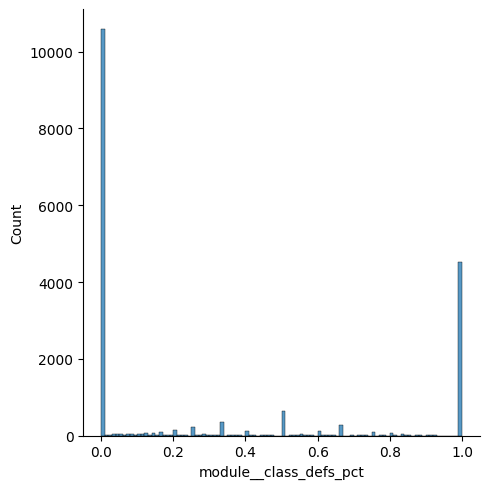

In [46]:
sns.displot(X['module__class_defs_pct'], bins=[i / 100 for i in range(0, 101)])

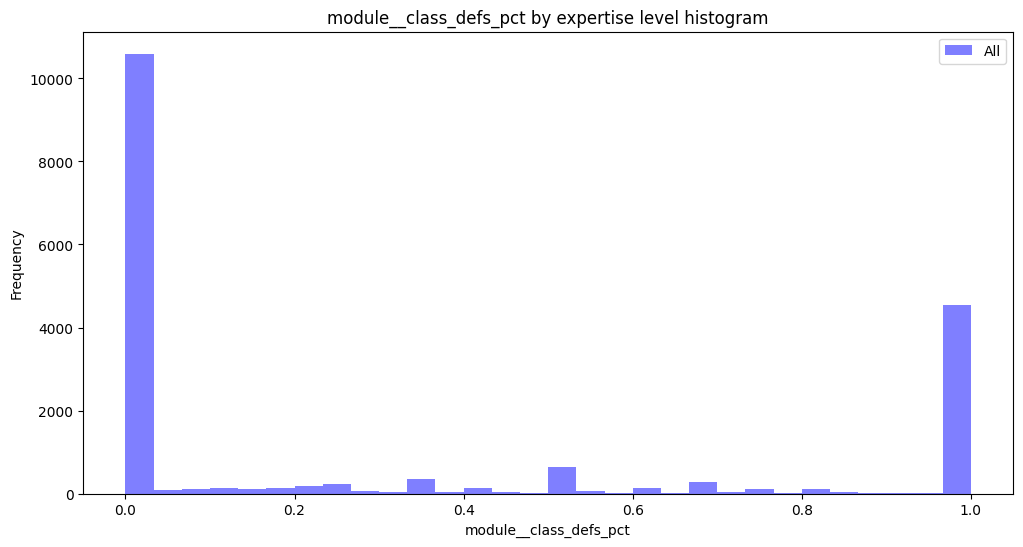

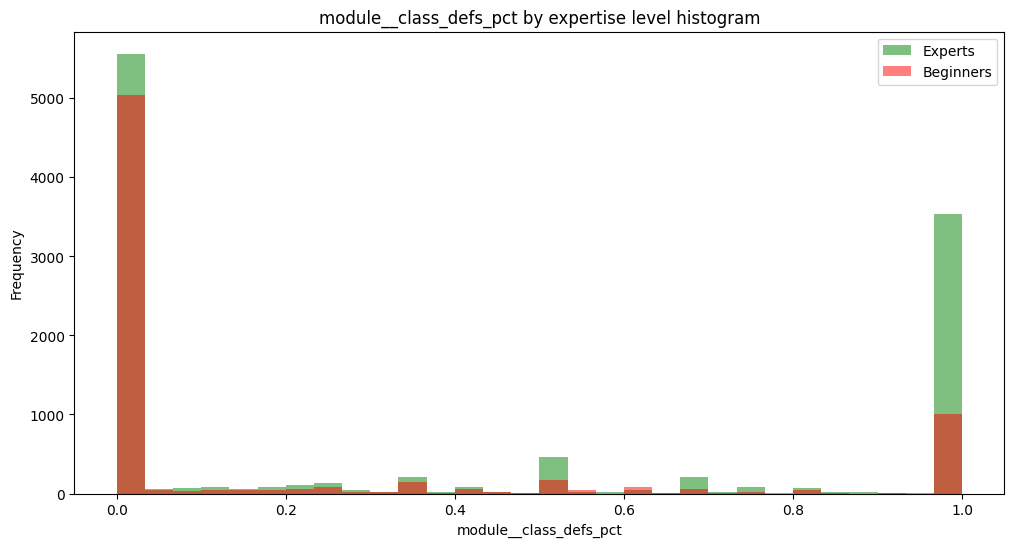

In [47]:
print_histogram(X, 'module__class_defs_pct', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__class_defs_pct', 'module__expertise_level', bins=30, include_all=False)

In [48]:
print_outliers_for_df_column(X, 'module__class_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.2517417073249817
Rango valores atípicos extremos (Tukey): [-2.6666666865348816,3.555555582046509]
Rango valores atípicos leves (Tukey): [-1.3333333432674408,2.222222238779068]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.5524380957632271,4.538603263557113]
-3.0IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a -2.6666666865348816 (Q1-3*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a -1.3333333432674408 (Q1-1.5*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__class_defs_pct superior a 2.222222238779068 (Q3+1.5*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__class_defs_pct superior a 3.555555582046509 (Q3-3*IQR) para module__cl

### IMPORTANTE
Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [49]:
X[(X['module__class_defs_pct'] > 0.0) & (X['module__class_defs_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,0.384714,0.142208,0.033307,3.338150,6.184971,0.413764,0.571883,0.014353,4.475358,3.886146,0.232919,0.160244,0.001927,0.003532,0.499358,0.005138,0.489082,0.000963,0.349069,0.650931
std,0.486606,0.144263,0.057575,6.185871,11.181180,0.218634,0.235574,0.073189,3.161454,3.697848,0.256680,0.366891,0.043860,0.059339,0.500080,0.071508,0.499961,0.031029,0.476752,0.476752
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.045455,0.000000,1.000000,1.000000,0.250000,0.400000,0.000000,2.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.100000,0.000000,2.000000,3.000000,0.400000,0.571429,0.000000,4.000000,3.375000,0.118347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.200000,0.052632,4.000000,6.000000,0.555556,0.750000,0.000000,5.500000,4.857143,0.483871,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,0.898649,0.886792,113.000000,258.000000,0.991228,0.985714,0.750000,34.500000,114.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable function_defs_pct (11/13)
Esta variable representa la proporción de deficiones que son definiciones de funciones. Esta variable toma valores de 0.0 - 1.0. Su media es 0.458978

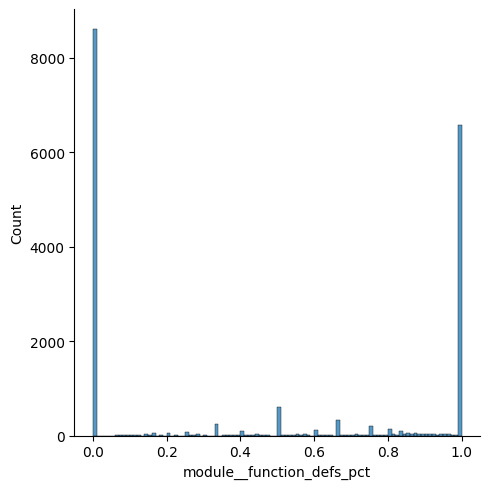

In [50]:
sns.displot(X['module__function_defs_pct'], bins=[i / 100 for i in range(0, 101)])

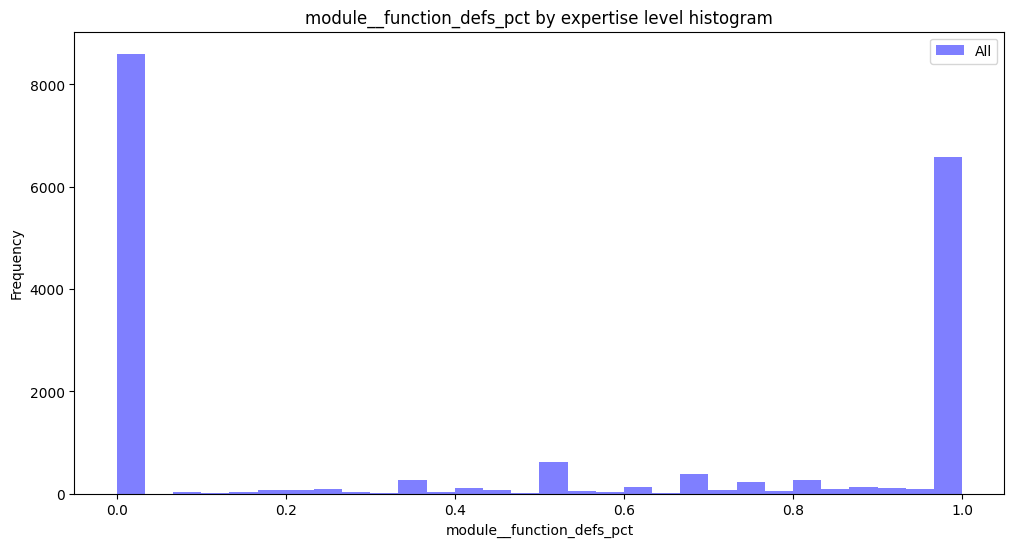

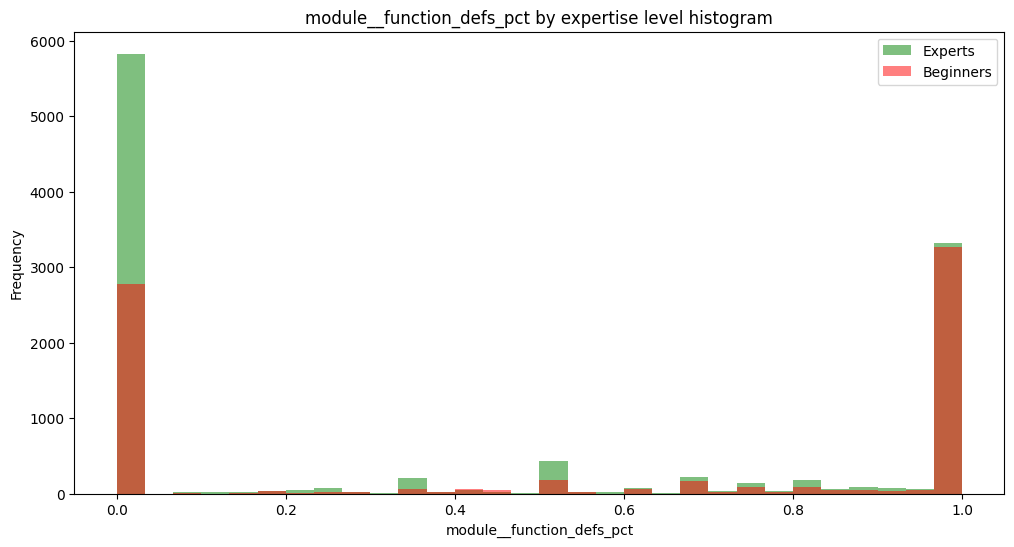

In [51]:
print_histogram(X, 'module__function_defs_pct', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__function_defs_pct', 'module__expertise_level', bins=30, include_all=False)

In [52]:
print_outliers_for_df_column(X, 'module__function_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.3456117109562014
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.44745653242156924,6.976959249495945]
-3.0IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -3.0 (Q1-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -1.5 (Q1-1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 2.5 (Q3+1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 4.0 (Q3-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valo

### IMPORTANTE
Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [53]:
X[(X['module__function_defs_pct'] > 0.0) & (X['module__function_defs_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000,3054.000000
mean,0.385069,0.142977,0.033220,3.329077,6.341847,0.405792,0.587861,0.006347,4.594640,3.874133,0.228474,0.164702,0.001965,0.003602,0.494434,0.005239,0.493779,0.000982,0.355927,0.644073
std,0.486691,0.144723,0.056531,6.237789,11.249969,0.219585,0.219344,0.043766,3.114623,3.735231,0.255927,0.370972,0.044288,0.059917,0.500051,0.072203,0.500043,0.031332,0.478872,0.478872
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.008772,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.045455,0.000000,1.000000,1.000000,0.230769,0.444444,0.000000,2.666667,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.100000,0.000000,2.000000,3.000000,0.400000,0.600000,0.000000,4.000000,3.333333,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.200000,0.052632,4.000000,7.000000,0.545455,0.750000,0.000000,5.536199,4.864286,0.473684,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,0.898649,0.886792,113.000000,258.000000,0.991228,0.985714,0.500000,34.500000,114.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable enum_defs_pct (12/13)
Esta variable representa la proporción de las definiciones que son clases con la notación enum. Esta variable toma valores de 0.0 - 1.0. Su media es 0.003743.

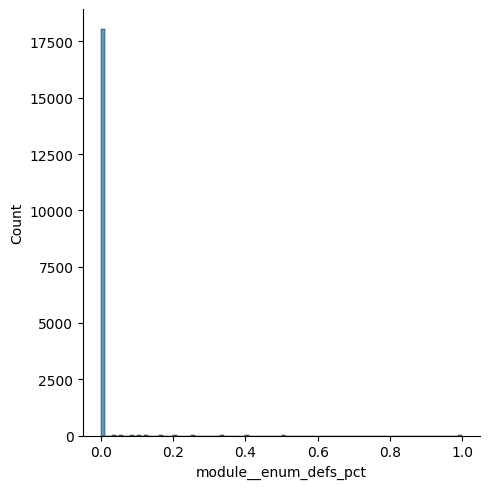

In [54]:
sns.displot(X['module__enum_defs_pct'], bins=[i / 100 for i in range(0, 101)])

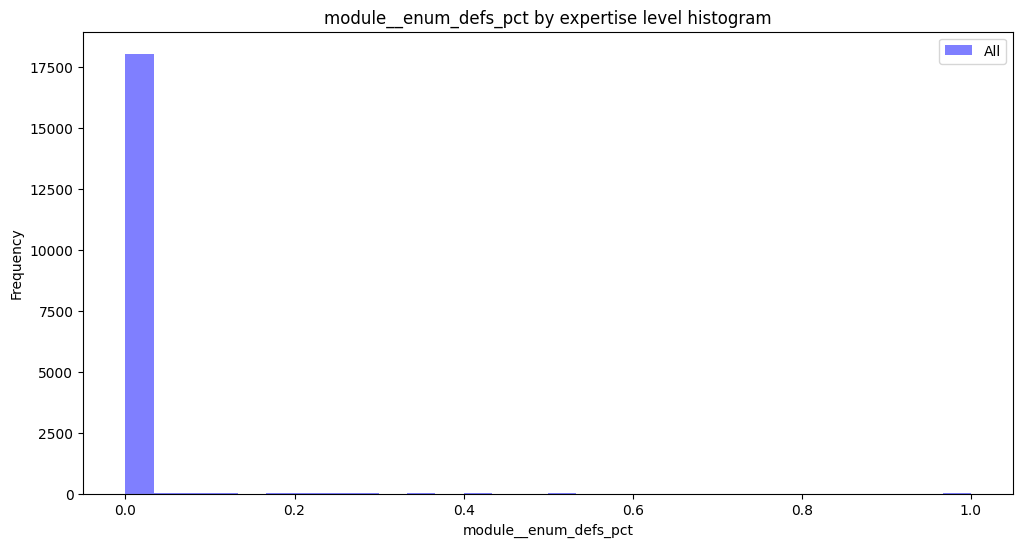

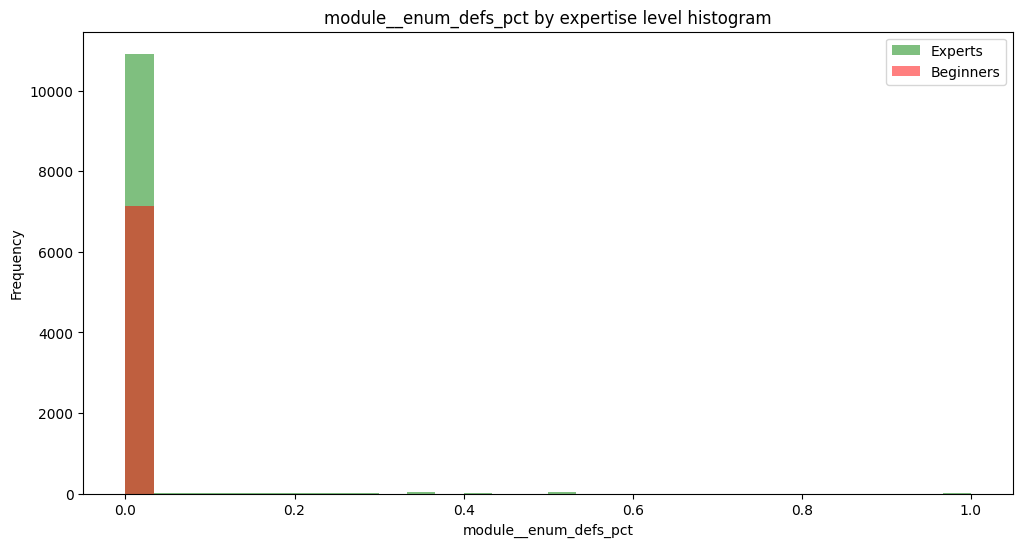

In [55]:
print_histogram(X, 'module__enum_defs_pct', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__enum_defs_pct', 'module__expertise_level', bins=30, include_all=False)

In [56]:
print_outliers_for_df_column(X, 'module__enum_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9567046669273629
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-3*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-1.5*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 189 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3+1.5*IQR) para module__enum_defs_pct. Representando un 1.037% del total de instancias.
+3.0IQR: 189 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3-3*IQR) para module__enum_defs_pct. Representando un 1.037% del total de instancias.
L: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 para module__en

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [57]:
X[X['module__enum_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.0,189.0,189.000000,189.0,189.000000,189.0,189.0,189.0
mean,0.343915,0.144781,0.035442,2.608466,3.285714,0.396824,0.242264,0.360912,1.997986,2.949368,0.367436,0.042328,0.0,0.0,0.661376,0.0,0.338624,0.0,0.0,1.0
std,0.476275,0.130338,0.081328,3.336633,8.320243,0.282182,0.308794,0.261220,2.852680,2.188952,0.248884,0.201871,0.0,0.0,0.474499,0.0,0.474499,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0
25%,0.000000,0.045455,0.000000,1.000000,0.000000,0.116279,0.000000,0.166667,0.000000,1.642857,0.125000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0
50%,0.000000,0.125000,0.000000,2.000000,0.000000,0.500000,0.000000,0.333333,0.000000,3.000000,0.425926,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.0
75%,1.000000,0.217391,0.045455,3.000000,3.000000,0.666667,0.500000,0.500000,3.500000,4.289474,0.574468,0.000000,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,1.0
max,1.000000,0.883721,0.724638,26.000000,59.000000,0.875000,0.950820,1.000000,16.000000,14.883721,0.870968,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0,0.0,1.0


### IMPORTANTE
Solo se han usado enums en 189 de las cerca de 19 mil modulos, apenas el 1%.

### Variable type_annotations_pct (13/13)
Esta variable representa la proporción de los parámetros y returns de funciones y métodos que tienen una anotación de tipo. Toma valores entre 0.0 - 1.0. Su media es 0.142791. 

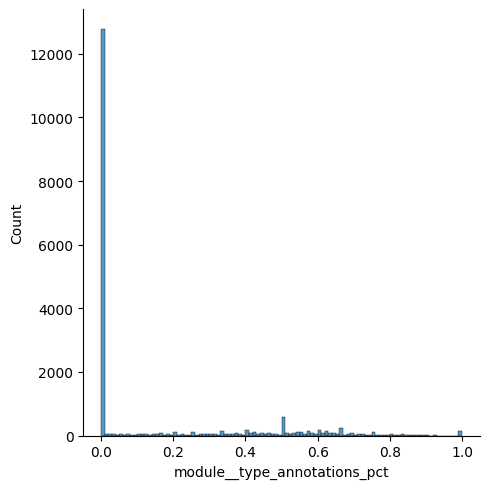

In [58]:
sns.displot(X['module__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

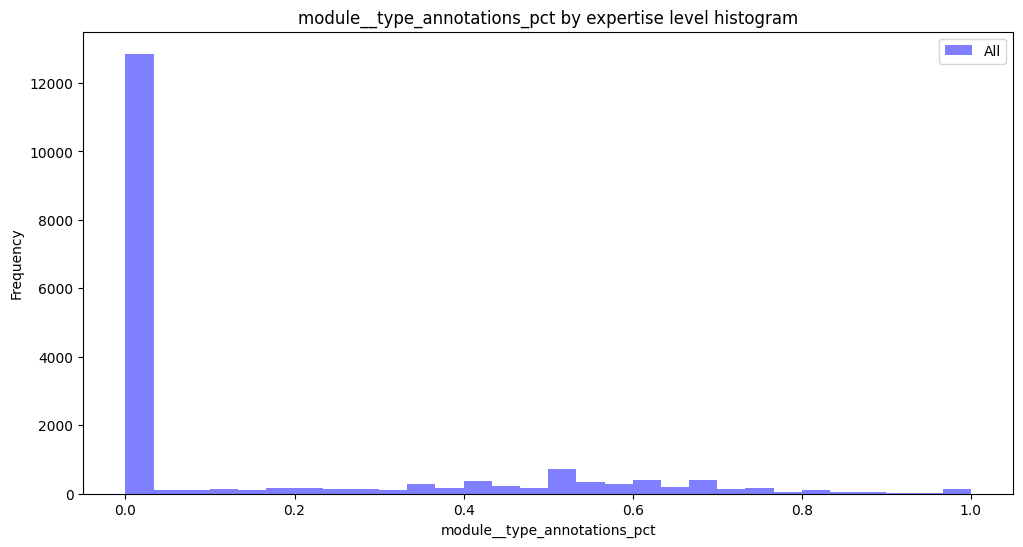

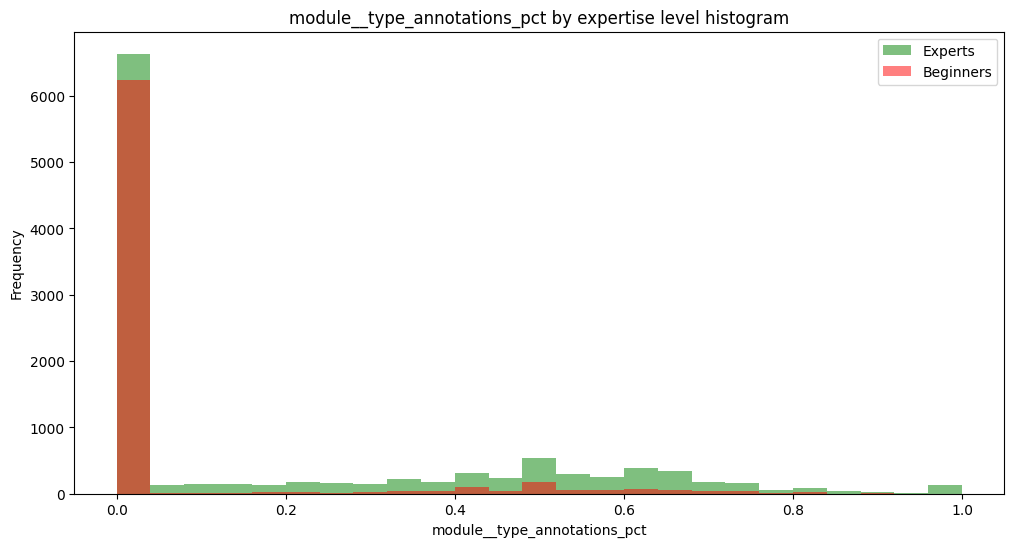

In [59]:
print_histogram(X, 'module__type_annotations_pct', 'module__expertise_level', bins=30, include_all=True, include_experts=False, include_beginners=False)
print_histogram(X, 'module__type_annotations_pct', 'module__expertise_level', bins=25, include_all=False)

In [60]:
print_outliers_for_df_column(X, 'module__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.34511692152120427
Rango valores atípicos extremos (Tukey): [-0.722222238779068,0.9629629850387573]
Rango valores atípicos leves (Tukey): [-0.361111119389534,0.6018518656492233]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.10790772843343761,1.6767933872352347]
-3.0IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a -0.722222238779068 (Q1-3*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a -0.361111119389534 (Q1-1.5*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1524 instancias tienen un valor para module__type_annotations_pct superior a 0.6018518656492233 (Q3+1.5*IQR) para module__type_annotations_pct. Representando un 8.362% del total de instancias.
+3.0IQR: 133 instancias tienen un valor para module__type_annotations_pct supe

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.96 (Con un MC de 34 usamos Tuckey Extremo)

In [61]:
X[X['module__type_annotations_pct'] > 0.96].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper,module__expertise_level_BEGINNER,module__expertise_level_EXPERT
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.0,134.000000,134.0,134.000000,134.000000,134.0,134.0,134.000000,134.000000,134.000000,134.0,134.0,134.0
mean,0.074627,0.049465,0.019892,0.029851,3.164179,0.004975,0.995025,0.0,6.810905,0.0,0.999272,0.156716,0.0,0.0,0.097015,0.022388,0.880597,0.0,0.0,1.0
std,0.263774,0.089632,0.070332,0.345547,3.666951,0.057591,0.057591,0.0,5.578042,0.0,0.004878,0.364897,0.0,0.0,0.297089,0.148497,0.325479,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.333333,0.0,1.000000,0.0,0.962963,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,3.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,1.0
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,5.875000,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,1.0
75%,0.000000,0.080357,0.000000,0.000000,4.000000,0.000000,1.000000,0.0,8.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,1.0
max,1.000000,0.333333,0.500000,4.000000,17.000000,0.666667,1.000000,0.0,32.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,1.0


## Multivariate

Isolation forest algorithm

In [62]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__expertise_level
426,Lower,False,0.368687,0.060606,60,37,0.618557,0.381443,0.0,4.594595,3.464684,0.000000,True,BEGINNER
448,Lower,False,0.341176,0.070588,53,35,0.602273,0.397727,0.0,4.428571,3.386555,0.000000,True,BEGINNER
543,Lower,False,0.341176,0.070588,53,35,0.602273,0.397727,0.0,4.428571,3.386555,0.000000,True,BEGINNER
3821,CamelUp,False,0.074074,0.000000,11,12,0.478261,0.521739,0.0,24.833334,0.000000,0.000000,True,BEGINNER
4327,Lower,False,0.368687,0.060606,60,37,0.618557,0.381443,0.0,4.594595,3.464684,0.000000,True,BEGINNER
4349,Lower,False,0.341176,0.070588,53,35,0.602273,0.397727,0.0,4.428571,3.386555,0.000000,True,BEGINNER
4447,Lower,False,0.341176,0.070588,53,35,0.602273,0.397727,0.0,4.428571,3.386555,0.000000,True,BEGINNER
4899,Lower,False,0.368687,0.060606,60,37,0.618557,0.381443,0.0,4.594595,3.464684,0.000000,True,BEGINNER
4922,Lower,False,0.341176,0.070588,53,35,0.602273,0.397727,0.0,4.428571,3.386555,0.000000,True,BEGINNER
5021,Lower,False,0.341176,0.070588,53,35,0.602273,0.397727,0.0,4.428571,3.386555,0.000000,True,BEGINNER


### IMPORTANTE
Analizar los 22 resultados obtenidos.

In [63]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
module__has_doc_string,22.0,0.045455,0.213201,0.000000,0.000000,0.000000,0.000000,1.000000
module__global_stmts_pct,22.0,0.310591,0.098905,0.061538,0.341176,0.341176,0.361809,0.368687
module__global_expressions_pct,22.0,0.055309,0.026339,0.000000,0.060606,0.070588,0.070588,0.070588
module__number_of_classes,22.0,49.454544,16.726730,6.000000,53.000000,53.000000,60.000000,64.000000
module__number_of_functions,22.0,33.909092,7.263143,12.000000,35.000000,35.000000,37.000000,41.000000
module__class_defs_pct,22.0,0.574734,0.107191,0.127660,0.602273,0.602273,0.618557,0.621359
module__function_defs_pct,22.0,0.425266,0.107191,0.378641,0.381443,0.397727,0.397727,0.872340
module__enum_defs_pct,22.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
module__average_stmts_function_body,22.0,7.293791,7.200235,4.428571,4.428571,4.428571,4.594594,25.317074
module__average_stmts_method_body,22.0,3.411989,1.818836,0.000000,3.386555,3.386555,3.464684,10.206349


In [64]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
module__has_doc_string,18204.0,0.248846,0.432356,0.0,0.0,0.000000,0.000000,1.0
module__global_stmts_pct,18204.0,0.227442,0.271974,0.0,0.0,0.125000,0.333333,1.0
module__global_expressions_pct,18204.0,0.094564,0.171681,0.0,0.0,0.000000,0.125000,1.0
module__number_of_classes,18204.0,0.989398,2.851918,0.0,0.0,0.000000,1.000000,113.0
module__number_of_functions,18204.0,2.485113,6.212161,0.0,0.0,1.000000,3.000000,258.0
module__class_defs_pct,18204.0,0.318931,0.429170,0.0,0.0,0.000000,0.909091,1.0
module__function_defs_pct,18204.0,0.459018,0.464798,0.0,0.0,0.333333,1.000000,1.0
module__enum_defs_pct,18204.0,0.003747,0.045201,0.0,0.0,0.000000,0.000000,1.0
module__average_stmts_function_body,18204.0,2.726599,3.920331,0.0,0.0,1.133333,4.391304,53.0
module__average_stmts_method_body,18204.0,1.662298,2.924928,0.0,0.0,0.000000,3.000000,114.0
